In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio

In [10]:
import pickle
import numpy 
from matplotlib import pyplot as plt
import matplotlib as mpl

import numpy as np
from ipywidgets import interact
import ipywidgets as widgets

with open('/Users/clay/Documents/research/prettyplots/test_data.pkl', 'rb') as f:
    plot_data = pickle.load(f)
    
config = {}

In [11]:
def get_config(plot_title,
               xlabel,
               ylabel,
               tick_fontsize=12,
               label_fontsize=15,
               legend_fontsize=15,
               suptitle_fontsize=20,
               colormap='Accent',
               linewidth=3, 
               grid=False,
               dpi=200,
               figure_width=7,
               figure_height=4,
               shade_alpha=0.5,
              ):
    global config
    config = {
        "figure.titlesize": suptitle_fontsize,
        "figure.figsize": (float(figure_width), float(figure_height)),
        "figure.dpi": dpi,
        "xtick.labelsize": tick_fontsize,
        "ytick.labelsize": tick_fontsize,
        "lines.linewidth": linewidth,
        "axes.labelsize": label_fontsize,
        "legend.fontsize": legend_fontsize,
        "axes.grid": grid,
        "image.cmap": colormap
        
    }
    for k,v in config.items():
        mpl.rcParams[k] = v
    
    cmap = mpl.cm.get_cmap(colormap)
    n_curves = len(plot_data)
    for ctr, (k,v) in enumerate(plot_data.items()):
        mean = v
        sem = np.random.random(size=len(mean))*10 + 50
        if k == 'LSTM':
            sem=0
        ccolor = cmap(ctr/n_curves)
        plt.plot(mean, label=k, linewidth=linewidth, color=ccolor)
        plt.fill_between(range(len(mean)), mean - sem, mean + sem, alpha=shade_alpha, color=ccolor)
    plt.legend(fontsize=legend_fontsize)
    plt.xticks(fontsize=tick_fontsize)
    plt.yticks(fontsize=tick_fontsize)
    plt.suptitle(plot_title);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    

interact(get_config,
         plot_title="Performance curves",
         xlabel='Update steps',
         ylabel='Mean reward (+/- sem)',
         linewidth=(0.0, 10.0, 1.), 
         tick_fontsize=(5, 20, 1),
         label_fontsize=(5, 20, 1),
         suptitle_fontsize=(5, 20, 1),
         legend_fontsize=(5, 20, 1),
         figure_width=(1, 20, 1),
         figure_height=(1,20, 1),
         dpi=(50, 200, 10),
         grid=False,
         shade_alpha=(0.0, 1.0, 0.1),
         colormap=mpl.pyplot.colormaps()
        );

interactive(children=(Text(value='Performance curves', description='plot_title'), Text(value='Update steps', d…

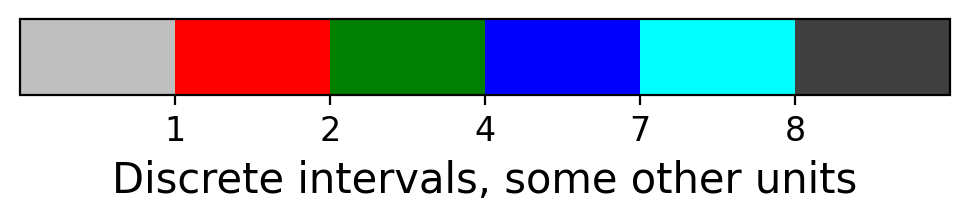

In [17]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = (mpl.colors.ListedColormap(['red', 'green', 'blue', 'cyan'])
        .with_extremes(over='0.25', under='0.75')
       )

cmap2 = (mpl.colors.ListedColormap(['red', 'green', 'blue', 'cyan'])
        .with_extremes(over='0.25', under='0.75')
       )

bounds = [1, 2, 4, 7, 8]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
fig.colorbar(
    mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
    cax=ax,
    boundaries=[0] + bounds + [13],  # Adding values for extensions.
#     extend='both',
    ticks=bounds,
#     spacing='proportional',
    orientation='horizontal',
    label='Discrete intervals, some other units',
)

In [61]:
def cmyk_rgb(color):
    c = color[0]
    m = color[1]
    y = color[2]
    k = color[3]
    
    r = (1-c/100)*(1-k/100)
    g = (1-m/100)*(1-k/100)
    b = (1-y/100)*(1-k/100)
    
    color_rgb = np.round(255*np.array([r, g, b]),1).astype('int')
    
    return color_rgb

In [63]:
color_rgb = cmyk_rgb([13,3,0,0])

color_rgb

In [129]:
import pandas as pd
url = 'https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv?raw=true'
url = 'https://github.com/axismaps/colorbrewer/blob/master/cb.csv?raw=true'
df = pd.read_csv(url)

df

,ColorName,NumOfColors,Type,CritVal,ColorNum,ColorLetter,C,M,Y,K,SchemeType
0,Accent,3.0,qual,NaN,1,A,50,0,50,0,Qualitative
1,NaN,NaN,NaN,NaN,2,B,25,25,0,0,NaN
2,NaN,NaN,NaN,NaN,3,C,0,25,40,0,NaN
3,Accent,4.0,qual,NaN,1,A,50,0,50,0,NaN
4,NaN,NaN,NaN,NaN,2,B,25,25,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1684,NaN,NaN,NaN,NaN,5,G,0,45,70,0,NaN
1685,NaN,NaN,NaN,NaN,6,H,0,70,75,0,NaN
1686,NaN,NaN,NaN,NaN,7,J,10,90,80,0,NaN
1687,NaN,NaN,NaN,NaN,8,K,25,100,70,0,NaN


In [110]:
df.columns

Index(['ColorName', 'NumOfColors', 'Type', 'CritVal', 'ColorNum',
       'ColorLetter', 'C', 'M', 'Y', 'K', 'SchemeType'],
      dtype='object')

In [145]:
df['ColorName'][df['ColorName'] == 'Blues']

33    Blues
36    Blues
40    Blues
45    Blues
51    Blues
58    Blues
66    Blues
Name: ColorName, dtype: object

In [148]:
df.values[33]

array(['Blues', 3.0, 'seq', nan, 1, 'C', 13, 3, 0, 0, 'Sequential'],
      dtype=object)

In [128]:
df['ColorName'][33], df['C'][33], 

('Blues', 13)

In [134]:
df['ColorName'].str.contains('Blues', case=False)

0       False
1         NaN
2         NaN
3       False
4         NaN
        ...  
1684      NaN
1685      NaN
1686      NaN
1687      NaN
1688      NaN
Name: ColorName, Length: 1689, dtype: object

In [152]:
df[df.values == 'Blues'].index

Int64Index([33, 36, 40, 45, 51, 58, 66], dtype='int64')